In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization



In [ ]:
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(32, (3, 3), activation='elu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='elu'),
    BatchNormalization(),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.35),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.35),
    MaxPooling2D(pool_size=(2, 2)),

    # Classifier/Dense Block
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.50),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_120 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_87 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_99 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_121 (Conv2D)         (None, 30, 30, 32)        9248      
                                                                 
 dropout_100 (Dropout)       (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                               

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

(x_train, y_train), (x_val, y_val) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255

NUM_CLASSES = 10
y_train = to_categorical(y_train, NUM_CLASSES)
y_val = to_categorical(y_val, NUM_CLASSES)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    min_delta=0.001,
    mode='min',
    restore_best_weights=True
)

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)


Epoch 1/50
391/391 [==============================] - 12s 21ms/step - loss: 0.2759 - categorical_accuracy: 0.9029 - val_loss: 0.5282 - val_categorical_accuracy: 0.8294
Epoch 2/50
391/391 [==============================] - 8s 19ms/step - loss: 0.2747 - categorical_accuracy: 0.9037 - val_loss: 0.4797 - val_categorical_accuracy: 0.8394
Epoch 3/50
391/391 [==============================] - 8s 19ms/step - loss: 0.2707 - categorical_accuracy: 0.9038 - val_loss: 0.5937 - val_categorical_accuracy: 0.8130
Epoch 4/50
391/391 [==============================] - 8s 20ms/step - loss: 0.2671 - categorical_accuracy: 0.9060 - val_loss: 0.4742 - val_categorical_accuracy: 0.8419
Epoch 5/50
391/391 [==============================] - 8s 20ms/step - loss: 0.2649 - categorical_accuracy: 0.9077 - val_loss: 0.4996 - val_categorical_accuracy: 0.8374
Epoch 6/50
391/391 [==============================] - 8s 20ms/step - loss: 0.2656 - categorical_accuracy: 0.9080 - val_loss: 0.4901 - val_categorical_accuracy: 0.83

In [ ]:
scores = model.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', scores[0])
print('Validation accuracy:', scores[1])


Validation loss: 0.4437785744667053
Validation accuracy: 0.8564000129699707


In [ ]:
def getBatch(batch_size, train_or_val='train'):
    x_batch = []
    y_batch = []
    dataset = x_train if train_or_val == 'train' else x_val
    labels = y_train if train_or_val == 'train' else y_val

    idx = np.random.randint(0, len(dataset), batch_size)

    for i in idx:
        x_batch.append(dataset[i])
        y_batch.append(labels[i])

    return np.array(x_batch), np.array(y_batch)


In [1]:
import numpy as np

CATEGORIES = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

import matplotlib.pyplot as plt

x_v, y_v = getBatch(10, "val")

for i in range(10):

  import numpy as np
  plt.imshow(x_v[i])
  plt.show()
  print("pred: " +  CATEGORIES[np.argmax(model.predict(x_v[i:i+1]))])
  print("acct: " + CATEGORIES[np.argmax(y_v[i])])





NameError: name 'getBatch' is not defined

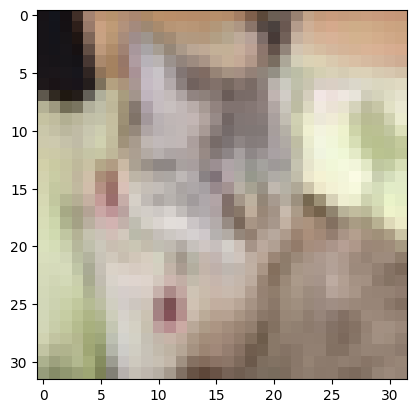

1/1 [==============================] - 0s 18ms/step
Predicted:  cat
Actual:  cat


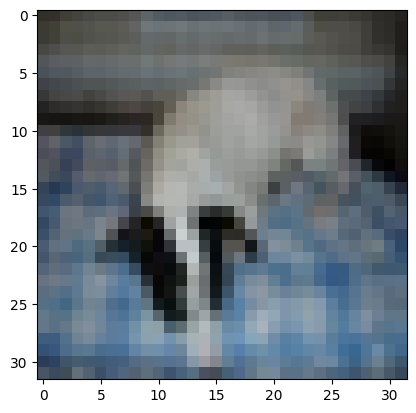

1/1 [==============================] - 0s 17ms/step
Predicted:  dog
Actual:  dog


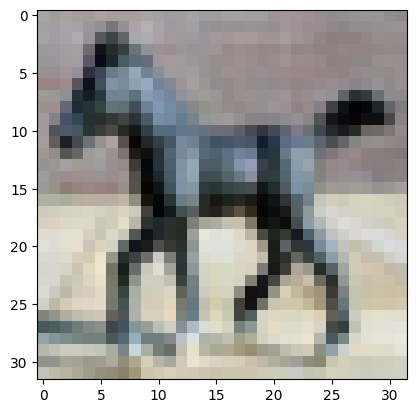

1/1 [==============================] - 0s 19ms/step
Predicted:  horse
Actual:  horse


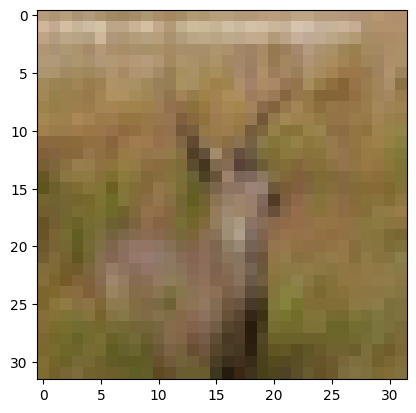

1/1 [==============================] - 0s 19ms/step
Predicted:  deer
Actual:  deer


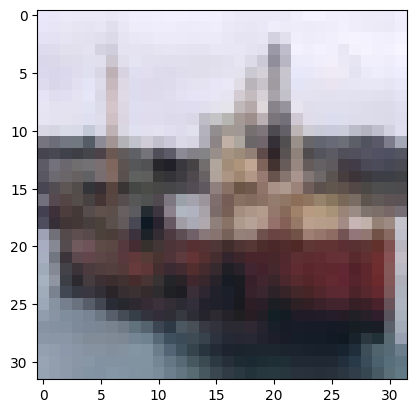

1/1 [==============================] - 0s 21ms/step
Predicted:  ship
Actual:  ship


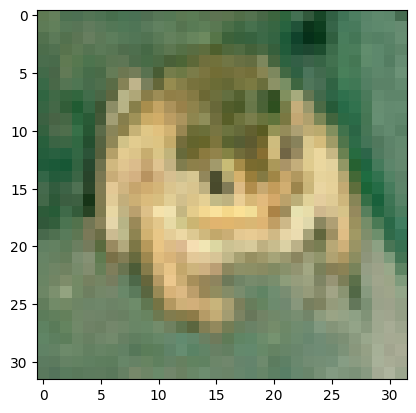

1/1 [==============================] - 0s 18ms/step
Predicted:  frog
Actual:  frog


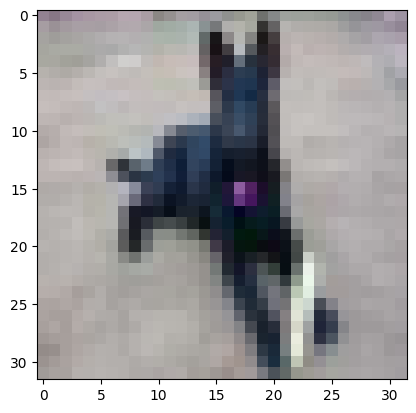

1/1 [==============================] - 0s 18ms/step
Predicted:  horse
Actual:  dog


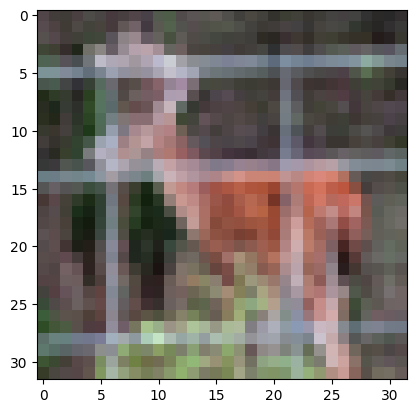

1/1 [==============================] - 0s 19ms/step
Predicted:  deer
Actual:  deer


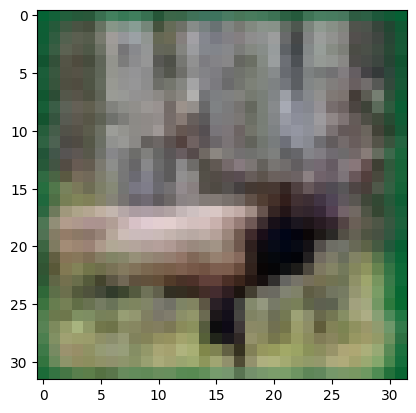

1/1 [==============================] - 0s 18ms/step
Predicted:  deer
Actual:  deer


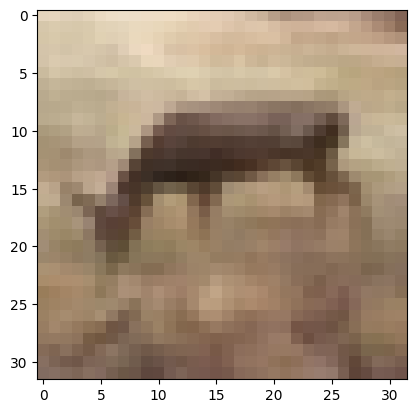

1/1 [==============================] - 0s 18ms/step
Predicted:  deer
Actual:  deer


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_batch, y_batch = getBatch(10, 'val')

for i in range(10):
    plt.imshow(x_batch[i])
    plt.show()
    pred = np.argmax(model.predict(x_batch[i:i+1]))
    print("Predicted: ", CATEGORIES[pred])
    print("Actual: ", CATEGORIES[np.argmax(y_batch[i])])
